Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Load data

In [3]:
# species_info.csv - contains data about different species and their conservation status
species_df = pd.read_csv('species_info.csv')

species_df.head()

category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN

In [4]:
# observations.csv - holds recorded sightings of different species at several national parks for the past 7 days.
observations_df = pd.read_csv('observations.csv')

observations_df.head()

scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

### Project goals:
1. What is the distribution of conservation_status for animals?
2. Are certain types of species more likely to be endangered?
3. Are the differences between species and their conservation status significant?
4. Which species were spotted the most at each park?

## Explore the Data

### Species

#### Finding number of unique Species

In [5]:
# number of species
print(f"Number of Species:{species_df.scientific_name.nunique()}")

Number of Species:5541


#### Finding number of  categories

In [6]:
# number of categories
print(f"Number of Categories:{species_df.category.nunique()}\n")
# list all categories
print(f"Categories:{species_df.category.unique()}")

Number of Categories:7

Categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


#### Number of rows for each category

In [7]:
species_df.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

#### number of unqiue conservation_status

In [8]:
# number of conservation_status
print(f"Number of conservation_status:{species_df.conservation_status.nunique()}\n")
# unique conservation_status values
print(f"Conservation_status values:{species_df.conservation_status.unique()}")

Number of conservation_status:4

Conservation_status values:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


explore conservation_status nan values

In [9]:
# total nan values
print(f"NaN value count:{species_df.conservation_status.isna().sum()}\n")
# size of other conservation_status values
print(species_df.groupby("conservation_status").size())

NaN value count:5633

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


### Observations

#### Number of Parks in DF

In [10]:
# number of National Parks in observations.csv
print(f"Number of National Parks:{observations_df.park_name.nunique()}\n")
# list unique park names
print(f"Park names:{observations_df.park_name.unique()}")

Number of National Parks:4

Park names:['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


#### Number of unqiue animals observed

In [11]:
# number of animals
print(f"Number of animals observed:{observations_df.scientific_name.nunique()}\n")
# total observations
print(f"Number of observations:{observations_df.observations.sum()}\n")
# groupby name
print(observations_df.groupby("scientific_name").size())

Number of animals observed:5541

Number of observations:3314739

scientific_name
Abies bifolia                          4
Abies concolor                         4
Abies fraseri                          4
Abietinella abietina                   4
Abronia ammophila                      4
                                      ..
Zonotrichia leucophrys gambelii        4
Zonotrichia leucophrys oriantha        4
Zonotrichia querula                    4
Zygodon viridissimus                   4
Zygodon viridissimus var. rupestris    4
Length: 5541, dtype: int64


# 1. What is the distribution of conservation_status for animals?

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`.

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [12]:
# replace NaN values
species_df.conservation_status.fillna('No Intervention', inplace=True)
print(species_df.groupby('conservation_status').size())

plt.hist(species_df.conservation_status)
plt.show()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64


TypeError: bar() missing 1 required positional argument: 'height'

### Create seperate table of conservation status and categories
- exclude No Intervention status

In [ ]:
conservationCategories = species_df[species_df.conservation_status != 'No Intervention'].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()

conservationCategories

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0

Text(0, 0.5, 'Number of Species')

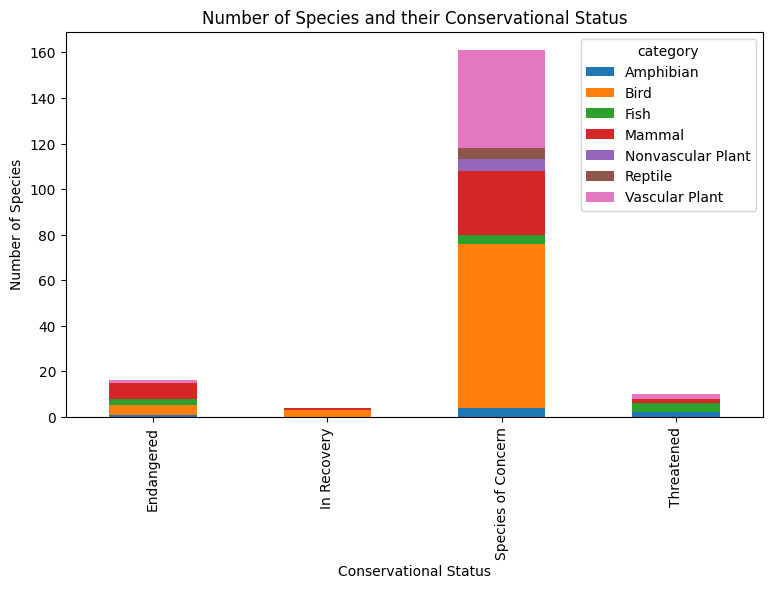

In [ ]:
ax = conservationCategories.plot(kind='bar', figsize=(9,5), stacked=True)

plt.title('Number of Species and their Conservational Status')
ax.set_xlabel('Conservational Status')
ax.set_ylabel('Number of Species')

# 2. Are certain types of species more likely to be endangered?
The next question is if certain types of species are more likely to be endangered? This can be answered by creating a new column called `is_protected` and include any species that had a value other than `No Intervention`. 

In [ ]:
species_df['is_protected'] = species_df['conservation_status'] != 'No Intervention'

Group by `category` and `is_protected` in a new table

In [ ]:
category_count = species_df.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected', index='category', values='scientific_name').reset_index()
# cahnge column names
category_count.columns = ['category', 'not_protected', 'protected']

category_count

category  not_protected  protected
0          Amphibian             72          7
1               Bird            413         75
2               Fish            115         11
3             Mammal            146         30
4  Nonvascular Plant            328          5
5            Reptile             73          5
6     Vascular Plant           4216         46

**Static numbers don't show much - All That this shows is that Birds, Mammals, and Vascular Plants have the most protected, the proportion to not_protected may be less than others**

In [ ]:
category_count['percentage'] = (category_count.protected / (category_count.protected + category_count.not_protected))*100

category_count

category  not_protected  protected  percentage
0          Amphibian             72          7    8.860759
1               Bird            413         75   15.368852
2               Fish            115         11    8.730159
3             Mammal            146         30   17.045455
4  Nonvascular Plant            328          5    1.501502
5            Reptile             73          5    6.410256
6     Vascular Plant           4216         46    1.079305

**With this analysis we can see that 15% of birds are protected whereas 17% of Mammals are protected**

# 3. Are the differences between species and their conservation status significant?

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first test will be called `contingency1` and will need to be filled with the correct numbers for mammals and birds.

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent. 

In [ ]:
from scipy.stats import chi2_contingency

# pull values from above table in step 2
contigency1 = [[30, 146],
               [75, 413]]

chi2_contingency(contigency1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

The next pair, is going to test the difference between `Reptile` and `Mammal`.

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Reptile|?|?|

This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

In [ ]:
contigency2 = [[30, 146],
               [5, 73]]

chi2_contingency(contigency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

# 4. Which species were spotted the most at each park?

In [ ]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_names = species_df[species_df.category == 'Mammal'].common_names.apply(remove_punctuations).str.split().tolist()

common_names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

remove duplicates

In [ ]:
clean_names = []

for item in common_names:
    item = list(dict.fromkeys(item))
    clean_names.append(item)
    
clean_names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

make one list

In [ ]:
clean_names_list = list(chain.from_iterable(i if isinstance(i,list) else [i] for i in clean_names))

clean_names_list[:10]

['Gappers',
 'RedBacked',
 'Vole',
 'American',
 'Bison',
 'Aurochs',
 'Domestic',
 'Cattle',
 'Feral',
 'Domesticated']

Count number of occurances for each word

In [ ]:
words_counted = []

for i in clean_names_list:
    x = clean_names_list.count(i)
    words_counted.append((i,x))

word_count_df = pd.DataFrame(set(words_counted), columns=['Word', 'Count']).sort_values("Count", ascending=False).reset_index()

word_count_df.head(10)

index      Word  Count
0    125       Bat     23
1     84     Shrew     18
2    193    Myotis     17
3    200     Mouse     16
4     40  Chipmunk     13
5    199  American     12
6     85  Squirrel     12
7    165      Vole     11
8     26   Eastern     11
9     28  Mountain     10

**Can analyze that bats were spotted the most at each park**

### Taking a closer look into bats

In [ ]:
species_df['is_bat'] = species_df.common_names.str.contains(r"\bBat\b", regex=True)

species_df.head(10)

category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   
5   Mammal         Odocoileus virginianus   
6   Mammal                     Sus scrofa   
7   Mammal                  Canis latrans   
8   Mammal                    Canis lupus   
9   Mammal                    Canis rufus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole     No Intervention   
1                              American Bison, Bison     No Intervention   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                                      Wapiti Or Elk     No Intervention   
5                                  White-Tailed Deer     No Intervention   
6                                Feral Hog, Wild Pig     No Intervention   
7                                             Coyote  Species of Concern   
8                                          Gray Wolf          Endangered   
9                                           Red Wolf          Endangered   

   is_protected  is_bat  
0         False   False  
1         False   False  
2         False   False  
3         False   False  
4         False   False  
5         False   False  
6         False   False  
7          True   False  
8          True   False  
9          True   False

is_bat subset

In [ ]:
species_df[species_df.is_bat]

category            scientific_name  \
28     Mammal   Corynorhinus rafinesquii   
29     Mammal           Eptesicus fuscus   
30     Mammal  Lasionycteris noctivagans   
31     Mammal          Lasiurus borealis   
32     Mammal          Lasiurus cinereus   
36     Mammal              Myotis leibii   
37     Mammal           Myotis lucifugus   
38     Mammal     Myotis septentrionalis   
39     Mammal             Myotis sodalis   
40     Mammal       Nycticeius humeralis   
3033   Mammal         Antrozous pallidus   
3034   Mammal    Corynorhinus townsendii   
3035   Mammal           Eptesicus fuscus   
3036   Mammal          Euderma maculatum   
3037   Mammal  Lasionycteris noctivagans   
3038   Mammal          Lasiurus cinereus   
3040   Mammal         Myotis ciliolabrum   
3042   Mammal           Myotis lucifugus   
4461   Mammal             Eumops perotis   
4462   Mammal      Tadarida brasiliensis   
4463   Mammal    Corynorhinus townsendii   
4464   Mammal      Lasiurus blossevillii   
4468   Mammal      Parastrellus hesperus   

                                           common_names conservation_status  \
28                           Rafinesque's Big-Eared Bat     No Intervention   
29                                        Big Brown Bat  Species of Concern   
30                                    Silver-Haired Bat  Species of Concern   
31                             Eastern Red Bat, Red Bat     No Intervention   
32                                            Hoary Bat     No Intervention   
36    Eastern Small-Footed Bat, Eastern Small-Footed...  Species of Concern   
37                Little Brown Bat, Little Brown Myotis  Species of Concern   
38             Northern Long-Eared Bat, Northern Myotis          Threatened   
39                Indiana Bat, Indiana Or Social Myotis          Endangered   
40                                          Evening Bat     No Intervention   
3033                             Pallid Bat, Pallid Bat  Species of Concern   
3034  Mule-Eared Bat, Pacific Townsend's Big-Eared B...     No Intervention   
3035                       Big Brown Bat, Big Brown Bat  Species of Concern   
3036                           Spotted Bat, Spotted Bat  Species of Concern   
3037               Silver-Haired Bat, Silver-Haired Bat  Species of Concern   
3038                               Hoary Bat, Hoary Bat     No Intervention   
3040  Small-Footed Myotis, Western Small-Footed Bat,...     No Intervention   
3042  Little Brown Bat, Little Brown Myotis, Little ...  Species of Concern   
4461                                Western Mastiff Bat     No Intervention   
4462                            Mexican Free-Tailed Bat     No Intervention   
4463                           Townsend's Big-Eared Bat     No Intervention   
4464                                    Western Red Bat  Species of Concern   
4468                                         Canyon Bat     No Intervention   

      is_protected  is_bat  
28           False    True  
29            True    True  
30            True    True  
31           False    True  
32           False    True  
36            True    True  
37            True    True  
38            True    True  
39            True    True  
40           False    True  
3033          True    True  
3034         False    True  
3035          True    True  
3036          True    True  
3037          True    True  
3038         False    True  
3040         False    True  
3042          True    True  
4461         False    True  
4462         False    True  
4463         False    True  
4464          True    True  
4468         False    True

merge species.is_bat with observations

In [ ]:
bat_observations = observations_df.merge(species_df[species_df.is_bat])

bat_observations.head(10)

scientific_name                            park_name  \
0     Lasiurus blossevillii                  Bryce National Park   
1     Lasiurus blossevillii  Great Smoky Mountains National Park   
2     Lasiurus blossevillii               Yosemite National Park   
3     Lasiurus blossevillii            Yellowstone National Park   
4  Corynorhinus rafinesquii               Yosemite National Park   
5  Corynorhinus rafinesquii  Great Smoky Mountains National Park   
6  Corynorhinus rafinesquii                  Bryce National Park   
7  Corynorhinus rafinesquii            Yellowstone National Park   
8      Nycticeius humeralis            Yellowstone National Park   
9      Nycticeius humeralis                  Bryce National Park   

   observations category                common_names conservation_status  \
0           113   Mammal             Western Red Bat  Species of Concern   
1            70   Mammal             Western Red Bat  Species of Concern   
2           123   Mammal             Western Red Bat  Species of Concern   
3           221   Mammal             Western Red Bat  Species of Concern   
4           188   Mammal  Rafinesque's Big-Eared Bat     No Intervention   
5            80   Mammal  Rafinesque's Big-Eared Bat     No Intervention   
6            57   Mammal  Rafinesque's Big-Eared Bat     No Intervention   
7           259   Mammal  Rafinesque's Big-Eared Bat     No Intervention   
8           219   Mammal                 Evening Bat     No Intervention   
9           110   Mammal                 Evening Bat     No Intervention   

   is_protected  is_bat  
0          True    True  
1          True    True  
2          True    True  
3          True    True  
4         False    True  
5         False    True  
6         False    True  
7         False    True  
8         False    True  
9         False    True

#### view how many bat observations were made at each National Park

In [ ]:
bat_observations.groupby("park_name").observations.sum().reset_index()

park_name  observations
0                  Bryce National Park          3433
1  Great Smoky Mountains National Park          2411
2            Yellowstone National Park          8362
3               Yosemite National Park          4786

breakdown for each park - protected bat sightings vs. non-protected

In [ ]:
observation_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()

observation_by_park

park_name  is_protected  observations
0                  Bryce National Park         False          1596
1                  Bryce National Park          True          1837
2  Great Smoky Mountains National Park         False          1299
3  Great Smoky Mountains National Park          True          1112
4            Yellowstone National Park         False          4044
5            Yellowstone National Park          True          4318
6               Yosemite National Park         False          2345
7               Yosemite National Park          True          2441

**Can analyse that all parks have sighted more protected bats than non-protected bats except for Great Smoky Mountains, this could be good for the bat populations.**

#### View of above chart

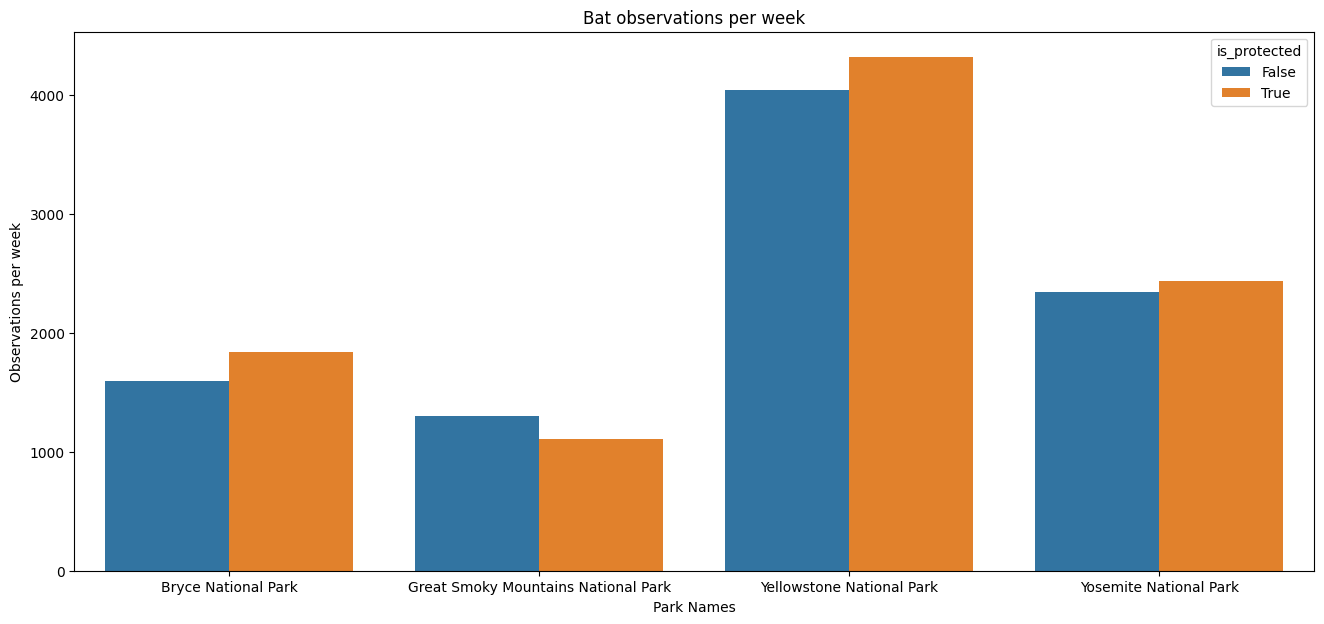

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(16,7))
sns.barplot(x=observation_by_park.park_name, y=observation_by_park.observations, hue=observation_by_park.is_protected)
plt.xlabel('Park Names')
plt.ylabel('Observations per week')
plt.title('Bat observations per week')
plt.show()
plt.clf()

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?
    - The vast majority of species were not part of conservation.(5,633 vs 191)
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.

## Further Research 

This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered. 